# <center>INTRODUCTION</center>

<center>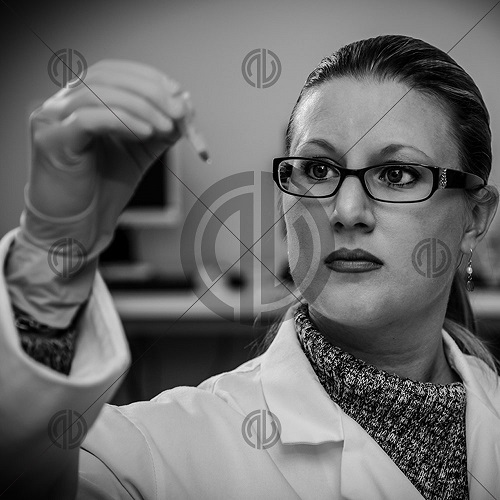</center>

![](https://darkdot.net/tahlil-yapan-doktor)

## <span style="color:blue">**CONTEXT**</span>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## <span style="color:blue">**CONTENT**</span>
1. age
1. sex
1. chest pain type (4 values)
1. resting blood pressure
1. serum cholestoral in mg/dl
1. fasting blood sugar > 120 mg/dl
1. resting electrocardiographic results (values 0,1,2)
1. maximum heart rate achieved
1. exercise induced angina
1. oldpeak = ST depression induced by exercise relative to rest
1. the slope of the peak exercise ST segment
1. number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### <span style="color:blue">**COLUMNS ( DATA FEATURES )**</span>
**age: **       age in years

**sex**:        (1 = male; 0 = female)

**cp**:         chest pain type

**trestbps**:   resting blood pressure (in mm Hg on admission to the hospital)

**chol**:       serum cholestoral in mg/dl

**fbs**:        (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg**:    resting electrocardiographic results

**thalach**:    maximum heart rate achieved

**exang**:      exercise induced angina (1 = yes; 0 = no)

**oldpeak**:    ST depression induced by exercise relative to rest

**slope**:      the slope of the peak exercise ST segment

**ca**:         number of major vessels (0-3) colored by flourosopy

**thal**:       3 = normal; 6 = fixed defect; 7 = reversable defect

**target**:     1 or 0

# <center>LOAD BASIC LIBRARY AND DATASET</center>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
# read data
data=pd.read_csv("../input/heart-disease-uci/heart.csv")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/imageupload/303-1000x1000.jpg
/kaggle/input/heart-disease-uci/heart.csv


 ### <span style="color:blue">THE DATA AND EXAMINATION</span>

In [2]:
df=data.copy() # Let's copy to protect the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()  # recognize the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 *An interesting a dataset. A liitle more, please*

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Nicee job, no null values.
> Is it statistics?
> Okey let's look


In [5]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(303, 14)

In [7]:
# deeper
# How is the correlation idea?
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


I don't like this, very complicated 

Text(0.5, 1.0, 'Correlation between features')

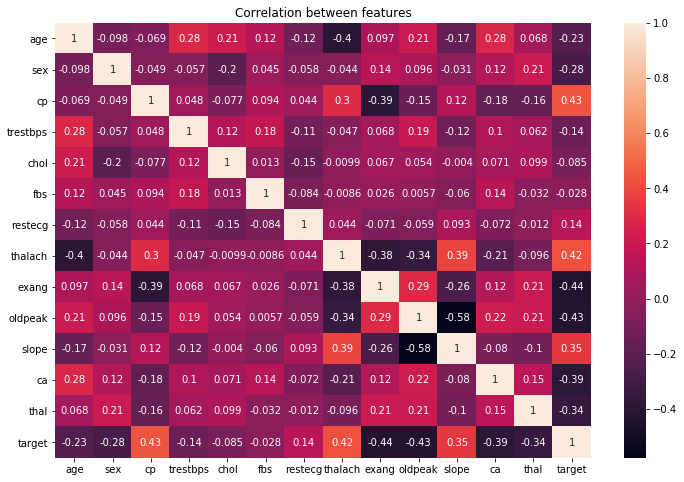

In [8]:
# It looks better
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between features")

  Let's check for our target variable "target"
*   Relatively high correlation with "cp", "thalach" ,"slope"
*   There is a different correlation with age and gender
*   Come on, let's  start visualizing  
  



## <span style="color:blue">DATA VISUALIZATION</span>

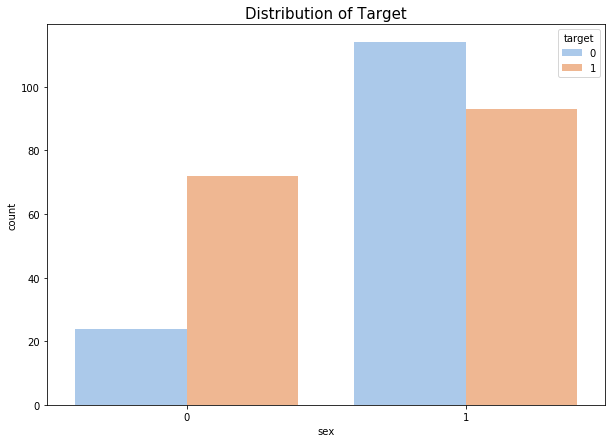

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(df['sex'],hue=df["target"], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 15)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


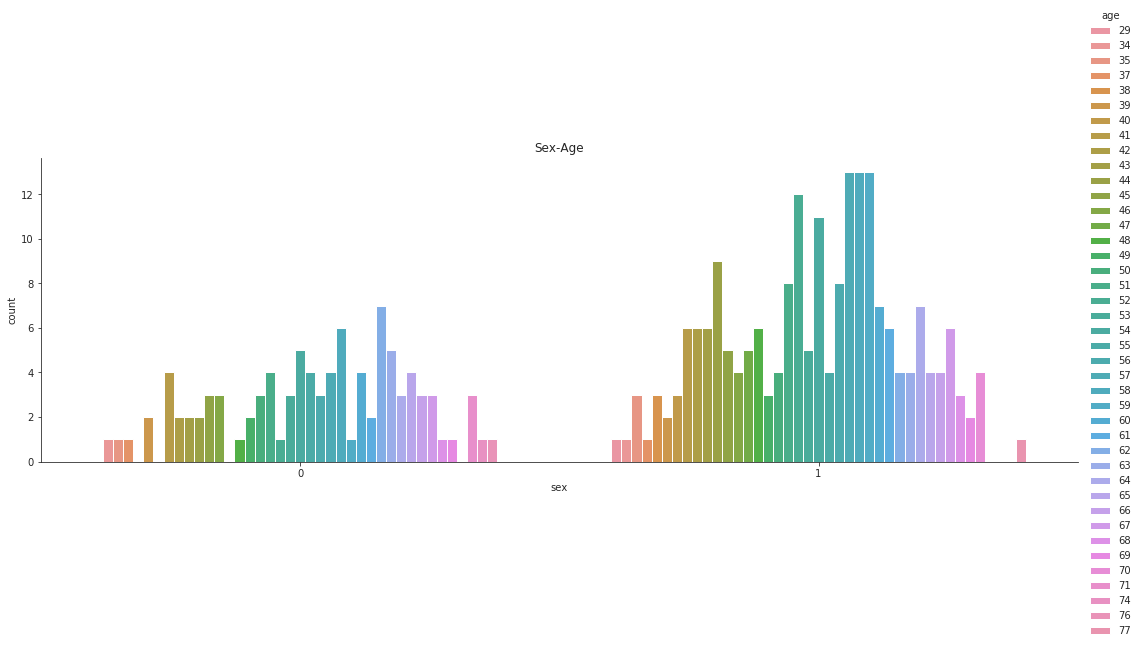

In [10]:
with sns.axes_style('ticks'):   
    g = sns.factorplot("sex", data=df, hue="age", aspect=3,
                       kind="count")
    plt.title("Sex-Age")

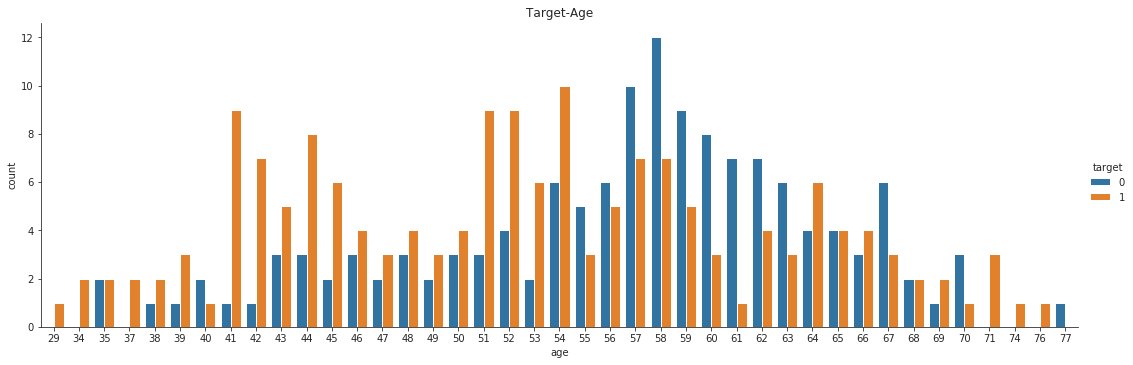

In [11]:
with sns.axes_style('ticks'):   
    g = sns.factorplot("age", data=df, hue="target", aspect=3,
                       kind="count")
    plt.title("Target-Age")

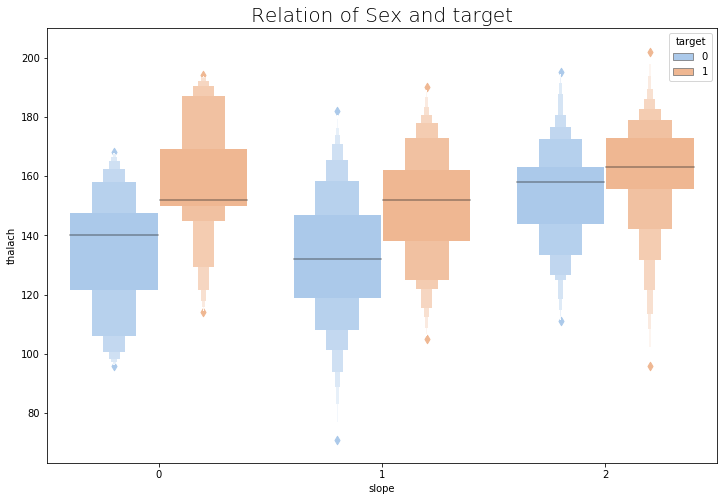

In [12]:
plt.figure(figsize=(12,8))
sns.boxenplot(data['slope'], data['thalach'],hue=data["target"], palette = 'pastel')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

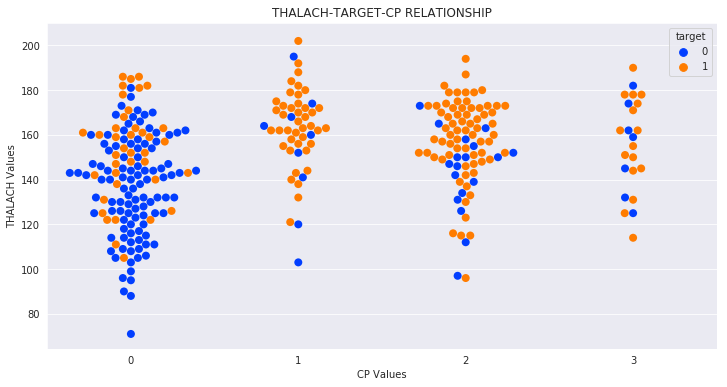

In [13]:
with sns.axes_style('darkgrid'): 
    plt.figure(figsize=(12,6))
    sns.swarmplot(x="cp",y="thalach",hue="target",data=df,size=8,palette="bright")
    plt.xlabel("CP Values")
    plt.ylabel("THALACH Values")
    plt.title("THALACH-TARGET-CP RELATIONSHIP")
    plt.show();

Text(0.5, 1.0, 'Age-Trestbps-Target Relationship')

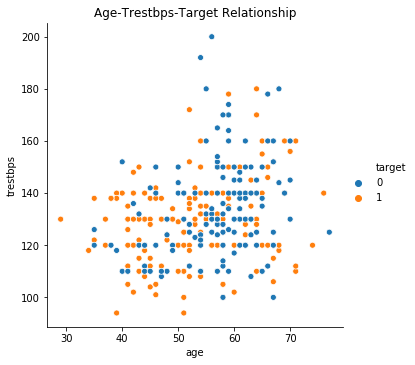

In [14]:
sns.relplot(x="age",y="trestbps",hue="target",data=df)
plt.title("Age-Trestbps-Target Relationship")

In [15]:
df["cp"]=df["cp"].astype("category")
df["slope"]=df["slope"].astype("category")
df["ca"]=df["ca"].astype("category")
df["thal"]=df["thal"].astype("category")

# <center>MODELING</center>

In [16]:
df=pd.get_dummies(data=df,columns=["ca","cp","slope","thal"])

In [17]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,1,0,0,1,0


In [18]:
df.shape

(303, 26)

In [19]:
X=df.drop('target',axis=1)
y=df['target']

print("Shape of y:", y.shape)
print("Shape of data_x:", X.shape)

Shape of y: (303,)
Shape of data_x: (303, 25)


In [20]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### <span style="color:blue">STANDARDIZATION</span>

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [23]:
X_train

array([[-1.35679832,  0.72250438, -0.61685555, ..., -0.24779731,
         0.86811473, -0.76269217],
       [ 0.38508599,  0.72250438,  1.1694912 , ..., -0.24779731,
        -1.15192147,  1.31114497],
       [-0.92132724,  0.72250438,  1.1694912 , ..., -0.24779731,
         0.86811473, -0.76269217],
       ...,
       [ 1.58263146,  0.72250438,  1.76494012, ..., -0.24779731,
         0.86811473, -0.76269217],
       [-0.92132724,  0.72250438, -0.61685555, ..., -0.24779731,
        -1.15192147,  1.31114497],
       [ 0.92942484, -1.38407465,  0.57404228, ..., -0.24779731,
         0.86811473, -0.76269217]])

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 25)
(61, 25)
(242,)
(61,)


# <center>MODELS</center>

## <span style="color:green">LOGISTIC REGRESSION MODEL</span>

In [25]:
log_model=LogisticRegression()

In [26]:
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_cv = GridSearchCV(log_model,param_grid=params,cv=5)

In [27]:
log_cv.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_se

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
log_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [29]:
log_tuned=LogisticRegression(C=0.1,penalty="l2").fit(X_train,y_train)
log_pred=log_tuned.predict(X_test)


In [30]:
log_test_score = accuracy_score(y_test, log_tuned.predict(X_test)) 
log_train_score= accuracy_score(y_train, log_tuned.predict(X_train))
log_test_cross=cross_val_score(log_tuned,X_test,y_test,cv=5).mean()  
log_train_cross=cross_val_score(log_tuned,X_train,y_train,cv=5).mean() 
print("Test score: %",log_test_score)
print("Train score: %",log_train_score)
print("Test cross_val_score:%",log_test_cross*100)
print("Train cross_val_score: %",log_train_cross*100)

Test score: % 0.8688524590163934
Train score: % 0.8553719008264463
Test cross_val_score:% 86.79487179487178
Train cross_val_score: % 84.6938775510204


In [31]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



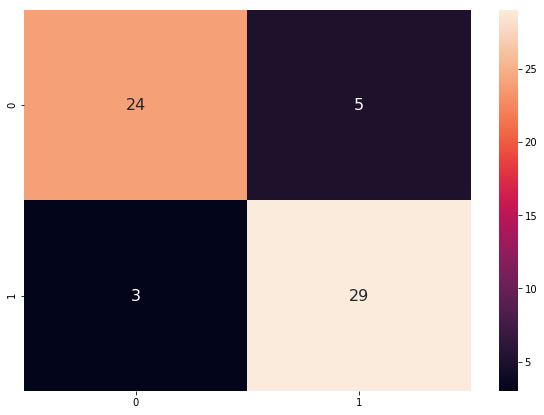

In [32]:
log_cm=confusion_matrix(y_test,log_pred)
plt.figure(figsize = (10,7))
sns.heatmap(log_cm, annot=True,annot_kws={"size": 16})

## <span style="color:green">RANDOM FOREST CLASSIFIER MODEL</span>

In [33]:
rf=RandomForestClassifier()

rf_params={"max_depth":[2,5,8,10],
          "min_samples_leaf":[1,3,10],
          "max_features":[2,5,8],
          "n_estimators": [30,50,100,300],
          "min_samples_split":[2,5]}

rf_cv=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  5.9min finished


In [34]:
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 30}

In [35]:
rf_tuned=RandomForestClassifier(max_depth=2,max_features=2,min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42).fit(X_train,y_train)
# rf_tuned=RandomForestClassifier(max_depth=8,max_features=2,min_samples_leaf=3,min_samples_split=5,n_estimators=50,random_state=42).fit(X_train,y_train)
rf_pred=rf_tuned.predict(X_test)

In [36]:
rf_test_score = accuracy_score(y_test, rf_tuned.predict(X_test)) 
rf_train_score= accuracy_score(y_train, rf_tuned.predict(X_train))
rf_test_cross=cross_val_score(rf_tuned,X_test,y_test,cv=10).mean()  
rf_train_cross=cross_val_score(rf_tuned,X_train,y_train,cv=10).mean()  
print("Random Forest Test Score: %",rf_test_score*100)
print("Random Forest Train Score: %",rf_train_score*100)
print("Random Forest Test Cross Validation Score: %",rf_test_cross*100)
print("Random Forest Train Cross Validation Score: %",rf_train_cross*100)

Random Forest Test Score: % 88.52459016393442
Random Forest Train Score: % 85.12396694214877
Random Forest Test Cross Validation Score: % 81.9047619047619
Random Forest Train Cross Validation Score: % 83.05


In [37]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



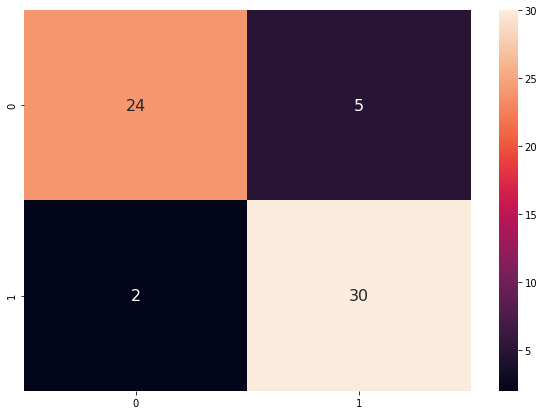

In [38]:
rf_cm=confusion_matrix(y_test,rf_pred)
plt.figure(figsize = (10,7))
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">K-NEIGBORS CLASSIFIERS</span>

In [39]:
knn_model=KNeighborsClassifier()

knn_cv=GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': range(2,30)}, cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

{'n_neighbors': 19}

In [40]:
knn_tuned=KNeighborsClassifier(n_neighbors=19).fit(X_train,y_train)
knn_pred=knn_tuned.predict(X_test)


In [41]:
knn_test_score = accuracy_score(y_test, knn_tuned.predict(X_test)) 
knn_train_score= accuracy_score(y_train, knn_tuned.predict(X_train))
knn_test_cross=cross_val_score(knn_tuned,X_test,y_test,cv=10).mean()  
knn_train_cross=cross_val_score(knn_tuned,X_train,y_train,cv=10).mean()  
print("KNN Test Score: %",knn_test_score*100)
print("KNN Train Score: %",knn_train_score*100)
print("KNN Test Cross Validation Score: %",knn_test_cross*100)
print("KNN Train Cross Validation Score: %",knn_train_cross*100)

KNN Test Score: % 90.1639344262295
KNN Train Score: % 84.29752066115702
KNN Test Cross Validation Score: % 88.57142857142858
KNN Train Cross Validation Score: % 84.73333333333332


In [42]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



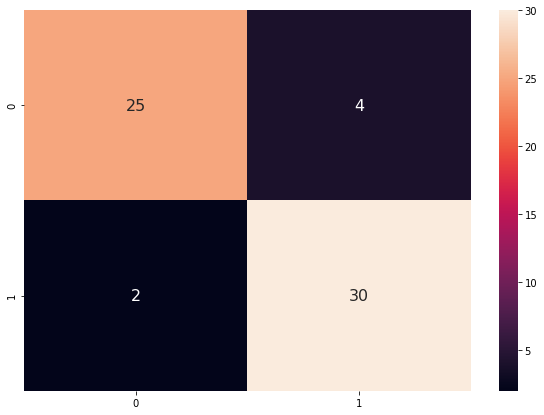

In [43]:
knn_cm=confusion_matrix(y_test,knn_pred)
plt.figure(figsize = (10,7))
sns.heatmap(knn_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">ARTIFICIAL NEURAL NETWORK</span>

In [44]:
from sklearn.neural_network import MLPClassifier
ysa=MLPClassifier()
param_grid ={
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(100,100,100)],
    'activation': ['tanh', 'relu','identity','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.01,0.1,0.5],
    
}
ysa_cv=GridSearchCV(ysa,param_grid,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2053 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.7min finished
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [45]:
ysa_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.5,
 'hidden_layer_sizes': (50, 50, 50),
 'solver': 'adam'}

In [46]:
ysa_tuned=MLPClassifier(activation="relu",alpha=0.5,hidden_layer_sizes=(50,50,50),solver="sgd",random_state=42).fit(X_train,y_train)
ysa_pred=ysa_tuned.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
ysa_test_score = accuracy_score(y_test, ysa_tuned.predict(X_test)) 
ysa_train_score= accuracy_score(y_train, ysa_tuned.predict(X_train))
ysa_test_cross=cross_val_score(ysa_tuned,X_test,y_test,cv=10).mean()  
ysa_train_cross=cross_val_score(ysa_tuned,X_train,y_train,cv=10).mean()  
print("Neural Network Forest Test Score: %",ysa_test_score*100)
print("Neural Network Train Score: %",ysa_train_score*100)
print("Neural Network Test Cross Validation Score: %",ysa_test_cross*100)
print("Neural Network Train Cross Validation Score: %",ysa_train_cross*100)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network Forest Test Score: % 90.1639344262295
Neural Network Train Score: % 85.12396694214877
Neural Network Test Cross Validation Score: % 86.9047619047619
Neural Network Train Cross Validation Score: % 77.75000000000001


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
print(classification_report(y_test,ysa_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



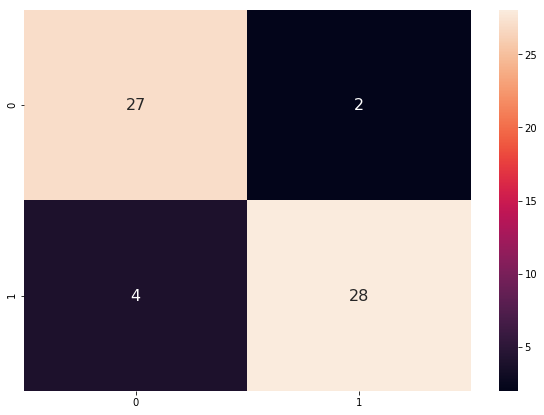

In [49]:
ysa_cm=confusion_matrix(y_test,ysa_pred)
plt.figure(figsize = (10,7))
sns.heatmap(ysa_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">GRADIENT BOOSTING CLASSIFIER</span> 

In [50]:
gbm_model=GradientBoostingClassifier(random_state=42)

gbm_params={
           "n_estimators":[100,150,200,250,300,400,500,600,700,800,900,100],
            "max_depth":[2,3,4,5,6,7,8,9,10],
           }

gbm_cv=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [51]:
gbm_cv.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [52]:
gbm_tuned=GradientBoostingClassifier(max_depth=2,n_estimators=100,random_state=0).fit(X_train,y_train)

In [53]:
gbm_test_score = accuracy_score(y_test, gbm_tuned.predict(X_test)) 
gbm_train_score= accuracy_score(y_train, gbm_tuned.predict(X_train))
gbm_test_cross=cross_val_score(gbm_tuned,X_test,y_test,cv=10).mean()  
gbm_train_cross=cross_val_score(gbm_tuned,X_train,y_train,cv=10).mean()  

In [54]:
print("Gradient Boosting Test Score: %",gbm_test_score*100)
print("Gradient Boostingk Train Score: %",gbm_train_score*100)
print("Gradient Boosting Test Cross Validation Score: %",gbm_test_cross*100)
print("Gradient Boosting Train Cross Validation Score: %",gbm_train_cross*100)

Gradient Boosting Test Score: % 85.24590163934425
Gradient Boostingk Train Score: % 93.80165289256198
Gradient Boosting Test Cross Validation Score: % 80.23809523809524
Gradient Boosting Train Cross Validation Score: % 82.63333333333334


In [55]:
print(classification_report(y_test, gbm_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



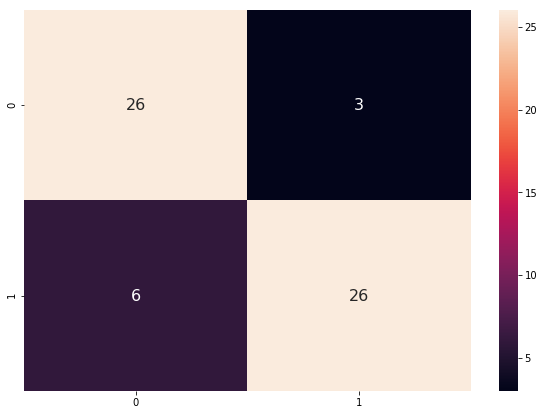

In [56]:
gbm_cm=confusion_matrix(y_test, gbm_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(gbm_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">XGB CLASSIFIER</span>  

In [57]:
xgb=XGBClassifier()

xgb_params={"n_estimators":[100,300,500,1000],
           "max_depth":[5,6,7,8],
           "learning_rate":[0.1,0.01,0.001,0.02,0.05],
           "min_samples_split":[2,5]}

xgb_cv=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [58]:
xgb_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [59]:
xgb_tuned=XGBClassifier(learning_rate=0.05,max_depth=8,min_samples_split=2,n_estimators=100).fit(X_train,y_train)

In [60]:
xgb_pred=xgb_tuned.predict(X_test)

In [61]:
xgb_test_score = accuracy_score(y_test, xgb_tuned.predict(X_test)) 
xgb_train_score= accuracy_score(y_train, xgb_tuned.predict(X_train))
xgb_test_cross=cross_val_score(xgb_tuned,X_test,y_test,cv=10).mean()  
xgb_train_cross=cross_val_score(xgb_tuned,X_train,y_train,cv=10).mean()  
print("XGradient Boosting Test Score: %",xgb_test_score*100)
print("XGradient Boostingk Train Score: %",xgb_train_score*100)
print("XGradient Boosting Test Cross Validation Score: %",xgb_test_cross*100)
print("XGradient Boosting Train Cross Validation Score: %",xgb_train_cross*100)

XGradient Boosting Test Score: % 88.52459016393442
XGradient Boostingk Train Score: % 99.58677685950413
XGradient Boosting Test Cross Validation Score: % 81.9047619047619
XGradient Boosting Train Cross Validation Score: % 81.4


In [62]:
print(classification_report(y_test,xgb_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



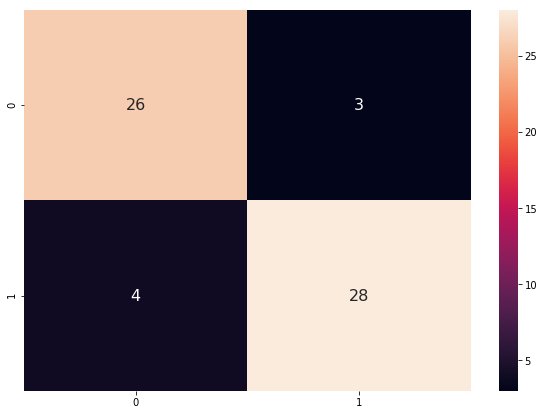

In [63]:
xgb_cm=confusion_matrix(y_test, xgb_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">   LIGHT GBM Classifier</span>

In [64]:
lgbm=LGBMClassifier()

lgbm_params={"n_estimators":[100,500,1000,2000],
            "subsample":[0.6,0.8,1.0],
            "max_depth":[3,4,5,6],
            "learning_rate":[0.1,0.01,0.02,0.05],
            "min_child_samples":[5,10,20]}

lgbm_cv=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)
lgbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 985 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1565 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2078 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2605 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3412 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4205 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 5286 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 10.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [65]:
lgbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [66]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,max_depth=3,min_child_samples=20,n_estimators=500,subsample=0.6).fit(X_train,y_train)



In [67]:
lgbm_pred=lgbm_tuned.predict(X_test)

In [68]:
lgbm_test_score = accuracy_score(y_test, lgbm_tuned.predict(X_test)) 
lgbm_train_score= accuracy_score(y_train, lgbm_tuned.predict(X_train))
lgbm_test_cross=cross_val_score(lgbm_tuned,X_test,y_test,cv=10).mean()  
lgbm_train_cross=cross_val_score(lgbm_tuned,X_train,y_train,cv=10).mean() 
print("Light Gradient Boosting Test Score: %",lgbm_test_score*100)
print("Light Gradient Boosting Train Score: %",lgbm_train_score*100)
print("Light Gradient Boosting Test Cross Validation Score: %",lgbm_test_cross*100)
print("Light Gradient Boosting Train Cross Validation Score: %",lgbm_train_cross*100)

Light Gradient Boosting Test Score: % 86.88524590163934
Light Gradient Boosting Train Score: % 92.14876033057851
Light Gradient Boosting Test Cross Validation Score: % 85.23809523809524
Light Gradient Boosting Train Cross Validation Score: % 83.46666666666668


In [69]:
print(classification_report(y_test,lgbm_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



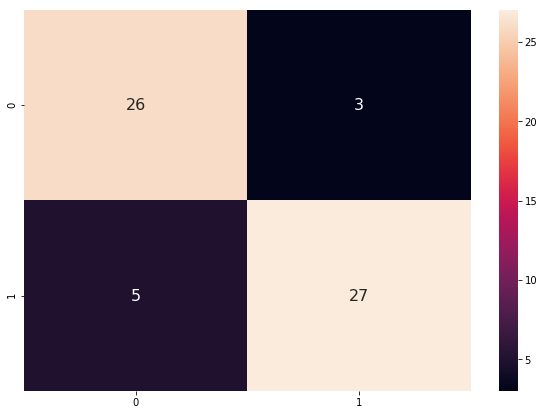

In [70]:
lgbm_cm=confusion_matrix(y_test, lgbm_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(lgbm_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green"> CATBOOST CLASSIFIER</span>

In [71]:
cat=CatBoostClassifier()

cat_params={"iterations":[200,300,400,500],
           "learning_rate":[0.01,0.05,0.1],
           "depth":[3,5,8]}

cat_cv=GridSearchCV(cat,cat_params,cv=10,n_jobs=-1,verbose=2)
cat_cv.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.4min finished


0:	learn: 0.6886753	total: 56.4ms	remaining: 11.2s
1:	learn: 0.6831142	total: 57.9ms	remaining: 5.73s
2:	learn: 0.6773967	total: 59.5ms	remaining: 3.91s
3:	learn: 0.6739184	total: 61.5ms	remaining: 3.01s
4:	learn: 0.6676547	total: 62.5ms	remaining: 2.44s
5:	learn: 0.6637071	total: 63.5ms	remaining: 2.05s
6:	learn: 0.6586420	total: 64.5ms	remaining: 1.78s
7:	learn: 0.6547330	total: 65.1ms	remaining: 1.56s
8:	learn: 0.6487994	total: 65.7ms	remaining: 1.4s
9:	learn: 0.6464023	total: 66.4ms	remaining: 1.26s
10:	learn: 0.6421732	total: 67.2ms	remaining: 1.16s
11:	learn: 0.6380579	total: 68ms	remaining: 1.06s
12:	learn: 0.6329184	total: 69ms	remaining: 993ms
13:	learn: 0.6280519	total: 70.2ms	remaining: 933ms
14:	learn: 0.6225238	total: 71.1ms	remaining: 877ms
15:	learn: 0.6183545	total: 72.5ms	remaining: 833ms
16:	learn: 0.6126366	total: 73.5ms	remaining: 792ms
17:	learn: 0.6074428	total: 74.4ms	remaining: 752ms
18:	learn: 0.6045697	total: 75.2ms	remaining: 716ms
19:	learn: 0.6009501	total:

GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0290e1a160>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 300, 400, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [72]:
cat_cv.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [73]:
cat_tuned=CatBoostClassifier(depth=3,iterations=200,learning_rate=0.01).fit(X_train,y_train)
cat_pred=cat_tuned.predict(X_test)

0:	learn: 0.6886753	total: 593us	remaining: 118ms
1:	learn: 0.6831142	total: 1.39ms	remaining: 137ms
2:	learn: 0.6773967	total: 1.9ms	remaining: 125ms
3:	learn: 0.6739184	total: 2.41ms	remaining: 118ms
4:	learn: 0.6676547	total: 2.89ms	remaining: 113ms
5:	learn: 0.6637071	total: 3.38ms	remaining: 109ms
6:	learn: 0.6586420	total: 3.85ms	remaining: 106ms
7:	learn: 0.6547330	total: 4.48ms	remaining: 108ms
8:	learn: 0.6487994	total: 4.95ms	remaining: 105ms
9:	learn: 0.6464023	total: 5.33ms	remaining: 101ms
10:	learn: 0.6421732	total: 5.8ms	remaining: 99.7ms
11:	learn: 0.6380579	total: 6.31ms	remaining: 98.9ms
12:	learn: 0.6329184	total: 7.01ms	remaining: 101ms
13:	learn: 0.6280519	total: 7.51ms	remaining: 99.8ms
14:	learn: 0.6225238	total: 7.99ms	remaining: 98.5ms
15:	learn: 0.6183545	total: 8.56ms	remaining: 98.4ms
16:	learn: 0.6126366	total: 9.19ms	remaining: 98.9ms
17:	learn: 0.6074428	total: 9.71ms	remaining: 98.1ms
18:	learn: 0.6045697	total: 10.2ms	remaining: 97.5ms
19:	learn: 0.6009

In [74]:
cat_test_score = accuracy_score(y_test, cat_tuned.predict(X_test)) 
cat_train_score= accuracy_score(y_train, cat_tuned.predict(X_train))
cat_test_cross=cross_val_score(cat_tuned,X_test,y_test,cv=10).mean()  
cat_train_cross=cross_val_score(cat_tuned,X_train,y_train,cv=10).mean()  
print("CatBoost Test Score: %",cat_test_score*100)
print("CatBoost Train Score: %",cat_train_score*100)
print("CatBoost Test Cross Validation Score: %",cat_test_cross*100)
print("CatBoost Train Cross Validation Score: %",cat_train_cross*100)

0:	learn: 0.6823981	total: 467us	remaining: 92.9ms
1:	learn: 0.6763987	total: 1.37ms	remaining: 136ms
2:	learn: 0.6702603	total: 1.98ms	remaining: 130ms
3:	learn: 0.6616544	total: 2.48ms	remaining: 121ms
4:	learn: 0.6573695	total: 2.95ms	remaining: 115ms
5:	learn: 0.6494249	total: 3.54ms	remaining: 114ms
6:	learn: 0.6405876	total: 4.2ms	remaining: 116ms
7:	learn: 0.6344451	total: 4.67ms	remaining: 112ms
8:	learn: 0.6273124	total: 5.37ms	remaining: 114ms
9:	learn: 0.6174598	total: 5.93ms	remaining: 113ms
10:	learn: 0.6112111	total: 6.54ms	remaining: 112ms
11:	learn: 0.6056471	total: 6.98ms	remaining: 109ms
12:	learn: 0.6012113	total: 7.46ms	remaining: 107ms
13:	learn: 0.5955631	total: 7.91ms	remaining: 105ms
14:	learn: 0.5866053	total: 8.42ms	remaining: 104ms
15:	learn: 0.5788572	total: 8.76ms	remaining: 101ms
16:	learn: 0.5740271	total: 9.19ms	remaining: 98.9ms
17:	learn: 0.5691177	total: 9.66ms	remaining: 97.7ms
18:	learn: 0.5630661	total: 10.1ms	remaining: 96.3ms
19:	learn: 0.5573836

### <span style="color:green">ALL RESULTS</span>

In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbors', 
        
               'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'Neural Network'],
    
    'Score_train': [log_train_score,knn_train_score,rf_train_score,xgb_train_score,lgbm_train_score,gbm_train_score,ysa_train_score],
    'Score_test': [log_test_score,knn_test_score,rf_test_score,xgb_test_score,lgbm_test_score,gbm_test_score,ysa_test_score],
                    
    "Cross_val_score_train":[log_train_cross,knn_train_cross,rf_train_cross,xgb_train_cross,lgbm_train_cross,gbm_train_cross,ysa_train_cross],
    "Cross_val_score_test": [log_test_cross,knn_test_cross,rf_test_cross,xgb_test_cross,lgbm_test_cross,gbm_test_cross,ysa_test_cross] })

In [76]:
models

,Model,Score_train,Score_test,Cross_val_score_train,Cross_val_score_test
0,Logistic Regression,0.855372,0.868852,0.846939,0.867949
1,k-Nearest Neighbors,0.842975,0.901639,0.847333,0.885714
2,Random Forest,0.851240,0.885246,0.830500,0.819048
3,XGBClassifier,0.995868,0.885246,0.814000,0.819048
4,LGBMClassifier,0.921488,0.868852,0.834667,0.852381
5,GradientBoostingClassifier,0.938017,0.852459,0.826333,0.802381
6,Neural Network,0.851240,0.901639,0.777500,0.869048


## CONCLUSION

### Which model do you think is the best?
### Thank you for coming here 

There is a lot more to learn: D